In [1]:
import pendulum
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")
sns.set_context(context="paper")

In [2]:
# check the initial values generated by the pendulum
inits = []
for i in range(1000):
    current_pend = pendulum.Pendulum()
    inits.append(current_pend.get_state())
init_df = pd.DataFrame(inits, columns=["cos", "sin", "dot"])

/home/joshua/anaconda3/envs/ai_gym/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [3]:
init_df = init_df.melt()
init_df.tail()

,variable,value
2995,dot,0.764774
2996,dot,-0.690118
2997,dot,-0.477292
2998,dot,-0.950319
2999,dot,-0.426203


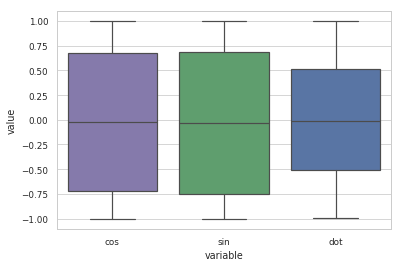

In [4]:
sns.boxplot(x="variable",
            y="value",
            palette=["m", "g", "b"],
            data=init_df)

In [5]:
# check the change in values of thetadot for some more steps
steps = 200
rollouts = 500
all_dots = []
for rollout in range(rollouts):
    current_pendulum = pendulum.Pendulum()
    current_dots = []
    for i in range(steps):
        current_dots.append([rollout, i, current_pendulum.get_state()[2]])
        next_action = pendulum.get_random_action()
        # next_action = -2
        current_pendulum(next_action)
        
    all_dots.append(current_dots)
all_dots = [item for sublist in all_dots for item in sublist]

dot_df = pd.DataFrame(data=all_dots, columns=["rollout", "step", "dot"])

In [6]:
print(dot_df.describe())
print(dot_df.info())
dot_df.head()

          rollout           step            dot
count  100000.000  100000.000000  100000.000000
mean      249.500      99.500000       0.013682
std       144.338      57.734594       3.542363
min         0.000       0.000000      -8.000000
25%       124.750      49.750000      -2.418964
50%       249.500      99.500000       0.007619
75%       374.250     149.250000       2.451372
max       499.000     199.000000       8.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
rollout    100000 non-null int64
step       100000 non-null int64
dot        100000 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB
None


,rollout,step,dot
0,0,0,-0.734057
1,0,1,-0.000262
2,0,2,0.711130
3,0,3,1.451953
4,0,4,2.040411


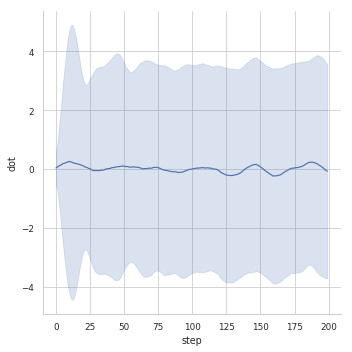

In [8]:
sns.relplot(x="step",
            y="dot",
            kind="line",
            ci="sd",
            #hue="rollout",
            #units="rollout",
            #estimator=None,
            data=dot_df#[dot_df["step"] < 50]
           )

/home/joshua/anaconda3/envs/ai_gym/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


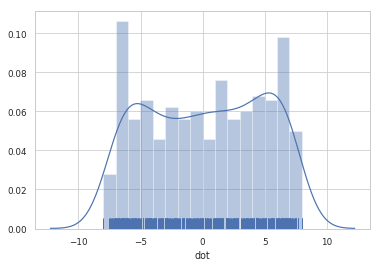

In [9]:
sns.distplot(dot_df[dot_df["step"] == 11]["dot"], bins=16, rug=True)

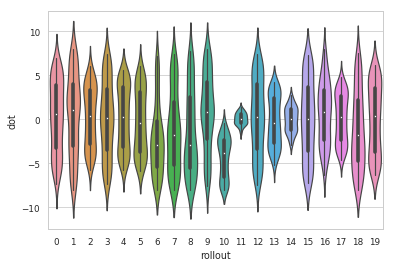

In [10]:
rl_sample = dot_df[dot_df["rollout"] < 20]
# this shows how many times the environment initializes in what state
sns.violinplot(x="rollout",
               y="dot",
               scale="count",
               inner="box",
               data=rl_sample
              )

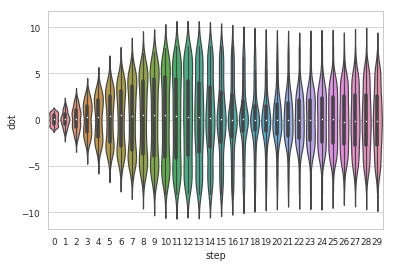

In [18]:
step_sample = dot_df[dot_df["step"] < 30]
# this shows, how the steps behave on average
sns.violinplot(x="step",
               y="dot",
               scale="count",
               inner="box",
               data=step_sample
              )

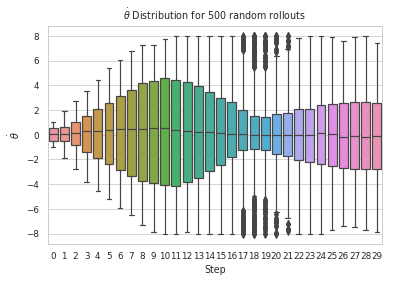

In [33]:
# a boxplot shows the same
box_plot = sns.boxplot(
    x="step",
    y="dot",
    data=step_sample
)
box_plot.set(title=r"$\dot\theta$ Distribution for 500 random rollouts", xlabel=r"Step",ylabel=r"$\dot\theta$")
box_plot.figure.savefig("graphics/thetadot_distribution.svg")

In [32]:
box_plot.figure.savefig("graphics/thetadot_distribution.svg")

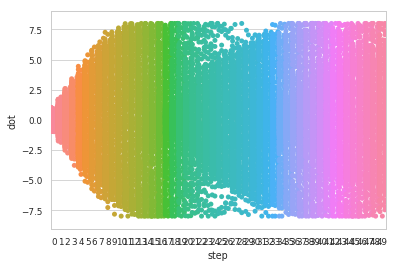

In [17]:
sns.swarmplot(x="step",
              y="dot",
              data=step_sample
             )